Quantum.py is a completely self contained library.

Optionally, if matplotlib is installed, it can be used for plotting graphs, else graphs can also be rendered in the terminal.

In [1]:
from quantum import *

This library simulates the quantum gates model of quantum computing.

Qubits are simply List[int || comp] of length 2, where the values represents the qubit as a vector of basis [ |0> , |1> ].

States of the system are also List[int || comp] of length 2^n for some natural number n.
The values are again a vector representation of basis [ |0> , |1> , |2> , ... |(2^n) - 1> ].

Individual qubits can be made using the qbit(x = 0 or 1) where x denotes the state of the qubit.

In [4]:
q0 = qbit(0)
q1 = qbit(1)

print("q0:", q0)
print("q1:", q1)

q0: [1, 0]
q1: [0, 1]


The MEASURE function simply measures any state, and returns a vector representation of the measurement.

In [6]:
MEASURE(q0)
#this simply shows the qubit itself, not a surprise there ofc, as the qubit is in the [1, 0] state.

[1, 0]

The qtensor function returns the tensor product of any two states. This function can basically be thought of as the "combine into a single system" function.

In [8]:
q0andq1state = qtensor(q0, q1)

print(q0andq1state)
print(MEASURE(q0andq1state)) #again, the state and measurement are the same as they are basically the same thing.

[0.00 + i0.00, 1.00 + i0.00, 0.00 + i0.00, 0.00 + i0.00]
[0, 1, 0, 0]


The extract function extracts the state of a single qubit from the state vector of a system.

In [12]:
measurement = MEASURE(q0andq1state)
print("q0 measured value:", extract(measurement, 0))
print("q1 measured value:", extract(measurement, 1))

q0 measured value: [1, 0]
q1 measured value: [0, 1]


# Gates

Gates in this library are 2D matrices of values that are comp or int type. The matrices are of type Matrix.

Any unitary Matrix is also a valid quantum gate.

Some predefined gates are:
- IGATE -> Identity gate
- HGATE -> Hadamard gate
- CNOT0 -> Controlled not gate (control bit at index 0)
- CNOT1 -> Controlled not gate (control bit at index 1)
- XGATE -> Pauli X gate
- YGATE -> Pauli Y gate
- ZGATE -> Pauli Z gate
- TGATE -> T gate
- SWAPGATE -> Swaps the states of 2 qubits
- TOFFOLIGATE -> Toffoli gate

Besides these, any List[List[comp || int]] can be converted into a gate by converting it into a Matrix type as shown.

To apply a gate on a state, simply multiply the gate by the state:

(Note that vectors can be represented by both row or column matrices. Both are equivalent.)

In [48]:
#putting q0 in superposition halfway between |0> and |1>.
q0super = (HGATE * q0)

print(q0super, type(q0super))

#converting to a list, as qtensor can take only lists
q0super = q0super.getlist()

print()
print(q0super, type(q0super))

#combining q0 in superposition with q1
q0superandq1 = qtensor(q0super, q1)
print()
print(q0superandq1)

[0.71 + i0.00]
[0.71 + i0.00] <class 'quantum.Matrix'>

[0.71 + i0.00, 0.71 + i0.00] <class 'list'>

[0.00 + i0.00, 0.71 + i0.00, 0.00 + i0.00, 0.71 + i0.00]


In [83]:
m = MEASURE(q0superandq1)
print("q0 value:", extract(m, 0), ", q1 value:", extract(m, 1))

#try running this cell a few times to see the different values the system can take

q0 value: [1, 0] , q1 value: [0, 1]


The run function can perform a large number of measurements of a givne state to analyse patterns.

|Ψ00> : 25.25%, |Ψ01> : 24.375%, |Ψ10> : 24.6875%, |Ψ11> : 25.687500000000004%


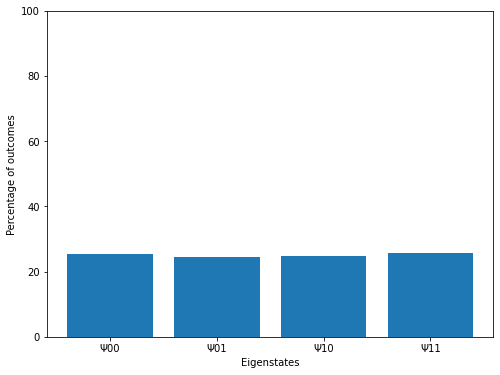

In [103]:
run(
    shots = 1600,
    state = qtensor( (HGATE * q0).getlist() , (HGATE * q1).getlist() ),
    graph = True,
    figsize = (8, 6)
)